<a href="https://colab.research.google.com/github/Bharat-Moorthy/Projects/blob/main/Bank_marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
#from google.colab import drive
#drive.mount('/content/drive')

In [100]:
path="/content/drive/MyDrive/Interview Question/bank-additional-full.csv"
data=pd.read_csv(path,sep=';')


In [101]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [102]:
data.shape

(41188, 21)

There are 41188 rows and 21 columns in the dataset

Basic checks in dataset

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

The dataset shows no missing values upfront 

In [104]:
data.dtypes.value_counts().to_frame()

,0
object,11
int64,5
float64,5


There are 11 categorical variables and 10 numerical / float variables are there 

In [105]:
data.describe().style.background_gradient(cmap="YlOrRd")

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.024060,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.421250,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


From the table we can see that age is varying from 17 to 98

Duration is varying from 0 to 4918

campaign is spread from 1 to 56

pdays have max 999 which is client not previously contacted

In [106]:
data.describe(include="object")

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


The above table shows the summary of the object type variables

In [107]:
data[data.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [108]:
data.drop_duplicates(keep='first',inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

The 12 duplicate entries have been removed 

In [109]:
data.isnull().sum().to_frame().style.bar(color="red")

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


There are no missing values currently , will check further to confirm

Exploratory Data Analysis

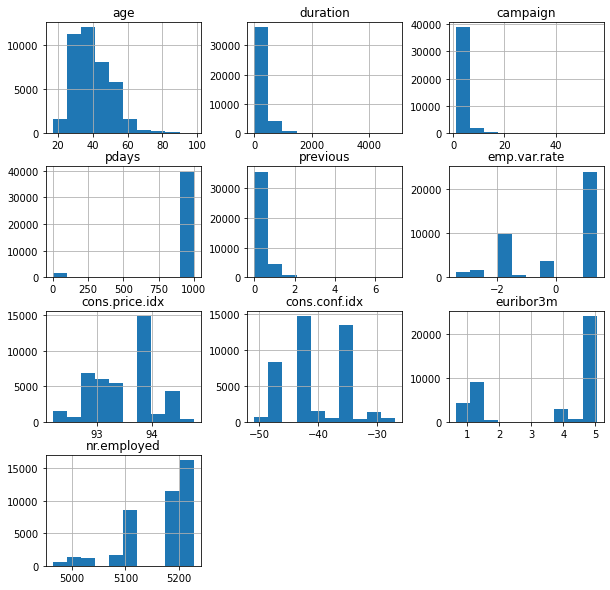

In [110]:
data.hist(figsize=(10,10))
plt.show()

In [111]:
data["y"].value_counts(normalize=True).to_frame()

,y
no,0.887337
yes,0.112663


The data is highly imbalanced which we need to deal before proceeding for modelling 

Text(0.5, 1.0, 'Distribution of the target variable ')

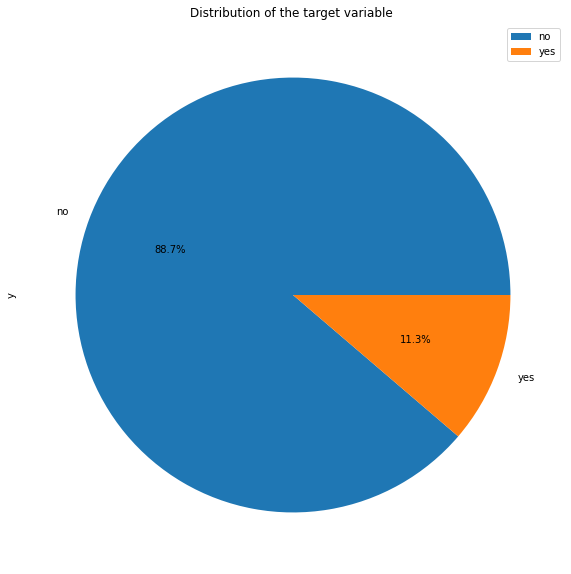

In [112]:
data["y"].value_counts().plot(kind = 'pie', autopct='%1.1f%%', figsize=(10, 10)).legend()
plt.title("Distribution of the target variable ")

Univariate analysis

1.Age

In [113]:
data["age"].value_counts()

31    1947
32    1845
33    1833
36    1779
35    1758
      ... 
89       2
91       2
94       1
87       1
95       1
Name: age, Length: 78, dtype: int64

Text(0.5, 1.0, 'Distribution of the Age ')

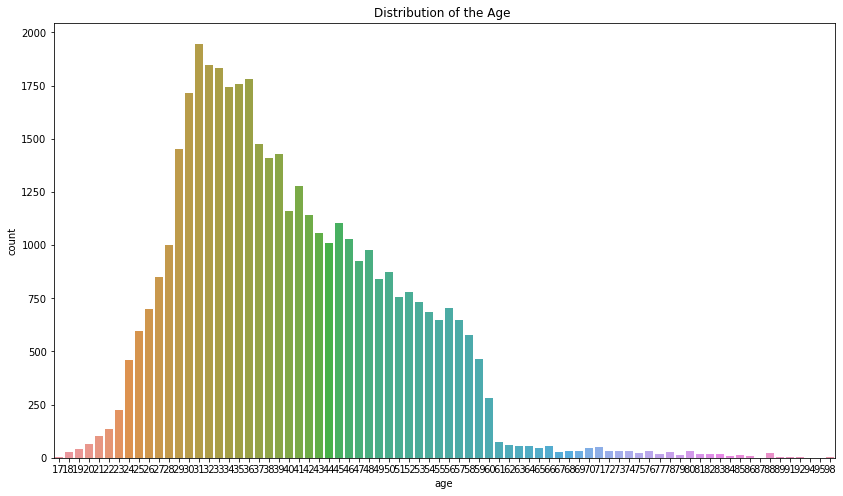

In [114]:
plt.figure(figsize=(14,8))
sns.countplot(data['age'])
plt.title('Distribution of the Age ')

The age column is slightly close to normal distribution but there is some skewness

2.JOb

In [115]:
data["job"].value_counts()

admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

Text(0.5, 1.0, 'Distribution of the Job ')

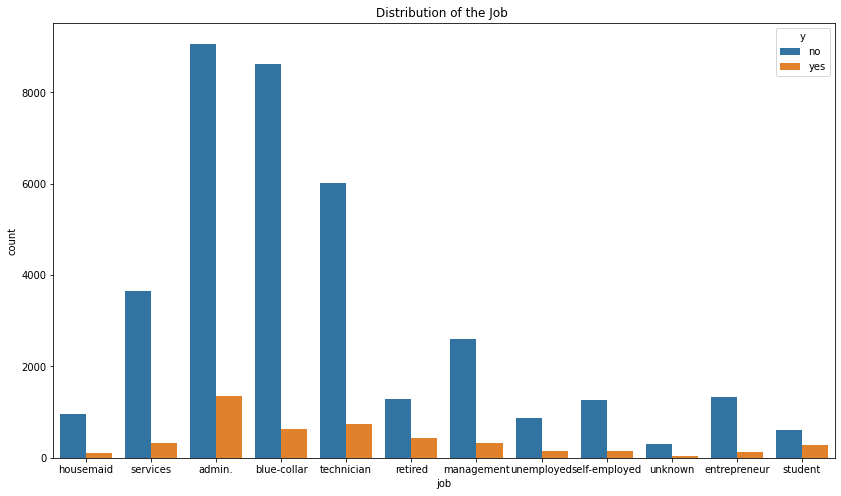

In [116]:
plt.figure(figsize=(14,8))
sns.countplot(x='job',hue='y',data=data)
plt.title('Distribution of the Job ')

We can see that more people are from admin job followed by blue collar and technician. But number opted from admin is very less compared to total numbers . The ratio of people opting is somewhat half in case of retired / student when compared to No . So these two categories have high chances . Other cases have drastic difference between opted and not opted .There is an unknown category which we need to handle later

3.Marital

In [117]:
data["marital"].value_counts()

married     24921
single      11564
divorced     4611
unknown        80
Name: marital, dtype: int64

Married is higher in number with unknown the least - We can handle unknownduring preprpcessing

Text(0.5, 1.0, 'Distribution of the marital ')

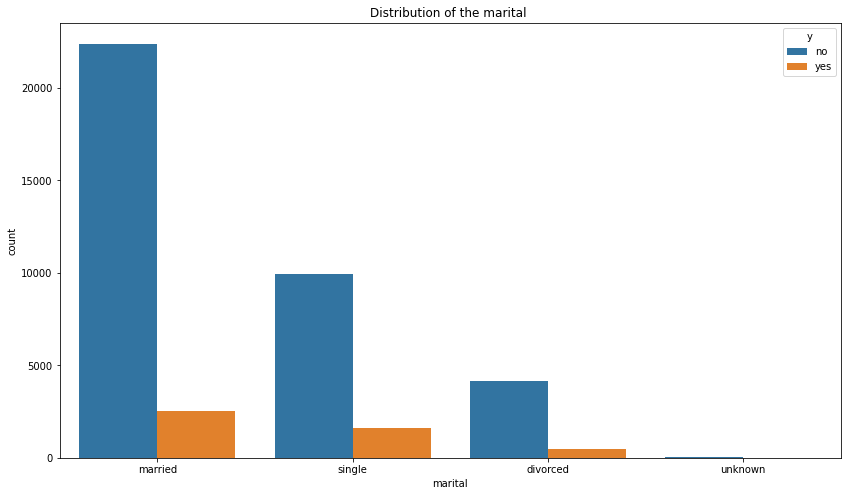

In [118]:
plt.figure(figsize=(14,8))
sns.countplot(x='marital',hue='y',data=data)
plt.title('Distribution of the marital ')

Here from graph , married is higher in number but in all categories ,opted number is very less and there is no clear dependency from target prespective 

4.Education

In [119]:
data["education"].value_counts()

university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: education, dtype: int64

University degree people are highest in number with least being illiterate 

Text(0.5, 1.0, 'Distribution of the education ')

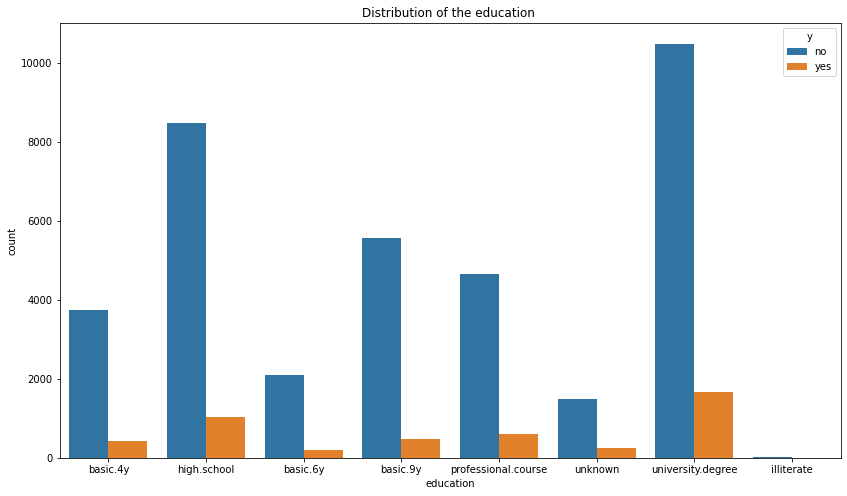

In [120]:
plt.figure(figsize=(14,8))
sns.countplot(x='education',hue='y',data=data)
plt.title('Distribution of the education ')

The university degree people have opted more but the number is very less when compared to not opted . Next highest is for High school people 

5.Default

In [121]:
data["default"].value_counts()

no         32577
unknown     8596
yes            3
Name: default, dtype: int64

Text(0.5, 1.0, 'Distribution of the default credit ')

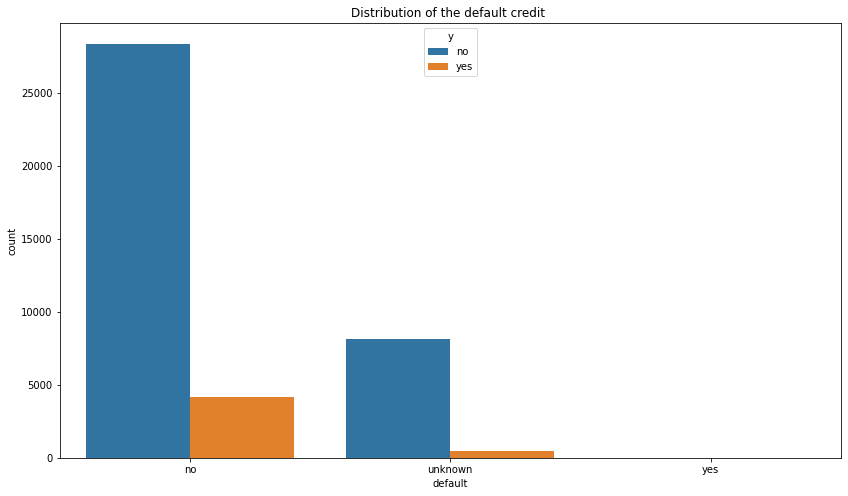

In [122]:
plt.figure(figsize=(14,8))
sns.countplot(x='default',hue='y',data=data)
plt.title('Distribution of the default credit ')

We can see that people having default credit are very less in number , majority is having no credit followed by Unknown status

6.Housing

In [123]:
data["housing"].value_counts()

yes        21571
no         18615
unknown      990
Name: housing, dtype: int64

Text(0.5, 1.0, 'Distribution of the housing loan status ')

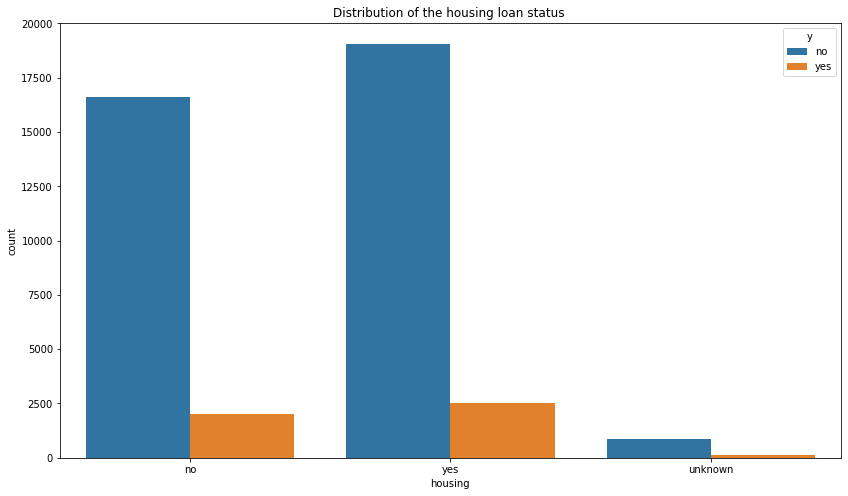

In [124]:
plt.figure(figsize=(14,8))
sns.countplot(x='housing',hue='y',data=data)
plt.title('Distribution of the housing loan status ')

The number of people having the housing loan is more but opted number is more or less same for both Yes and no cases

7.Loan

In [125]:
data["loan"].value_counts()

no         33938
yes         6248
unknown      990
Name: loan, dtype: int64

Text(0.5, 1.0, 'Distribution of the personal loan status ')

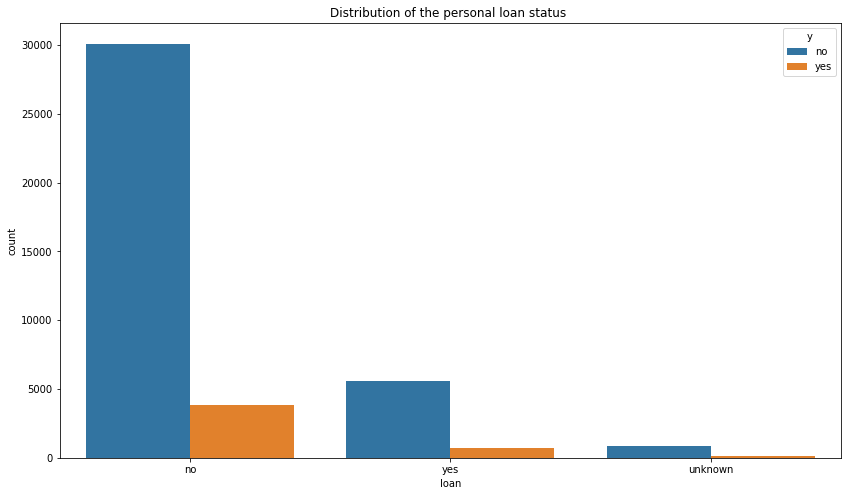

In [126]:
plt.figure(figsize=(14,8))
sns.countplot(x='loan',hue='y',data=data)
plt.title('Distribution of the personal loan status ')

Here also the opted ones are more for people having no personal loan but that is very less compared with the not opted ones. Same is the case for people having personal loans

8.COntact

In [127]:
data["contact"].value_counts()

cellular     26135
telephone    15041
Name: contact, dtype: int64

Text(0.5, 1.0, 'Distribution of the contact status ')

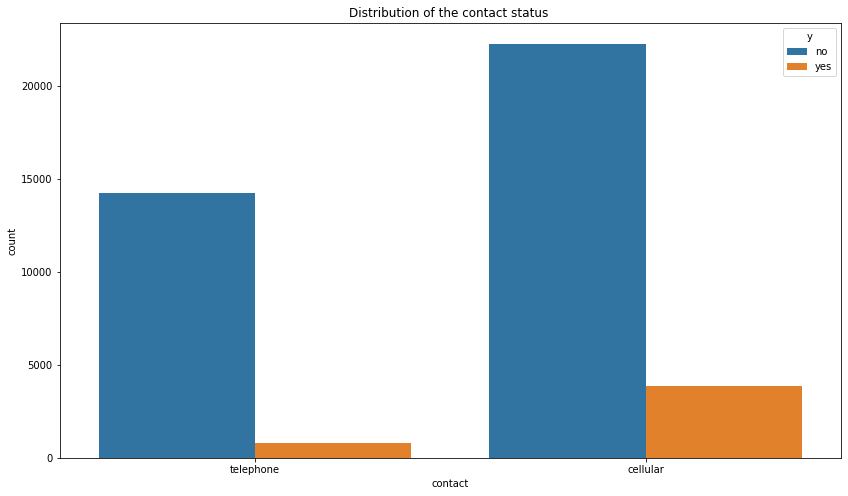

In [128]:
plt.figure(figsize=(14,8))
sns.countplot(x='contact',hue='y',data=data)
plt.title('Distribution of the contact status ')

Communication type cellular have more people opting compared to telephone . There is a signoficant difference in number between the two , so we can consider it as observation

9.Month

In [129]:
data["month"].value_counts()

may    13767
jul     7169
aug     6176
jun     5318
nov     4100
apr     2631
oct      717
sep      570
mar      546
dec      182
Name: month, dtype: int64

Text(0.5, 1.0, 'Distribution of the month contact status ')

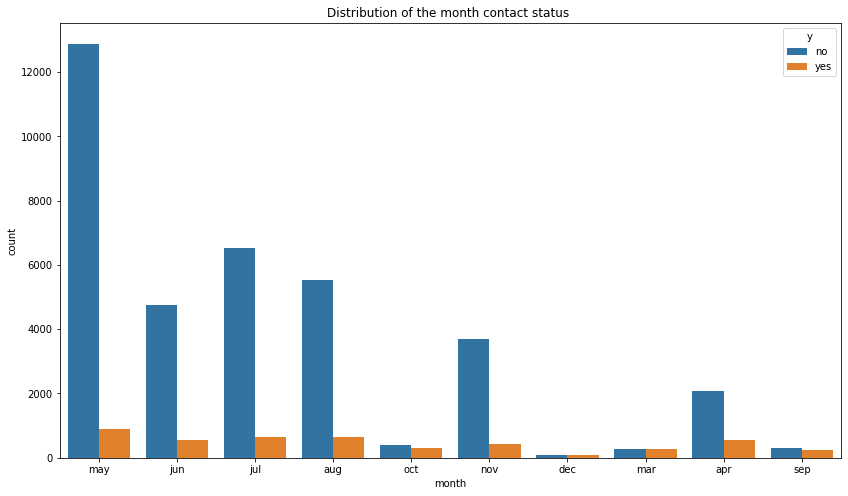

In [130]:
plt.figure(figsize=(14,8))
sns.countplot(x='month',hue='y',data=data)
plt.title('Distribution of the month contact status ')

10.day_of_week

In [131]:
data["day_of_week"].value_counts()

thu    8618
mon    8512
wed    8134
tue    8086
fri    7826
Name: day_of_week, dtype: int64

Text(0.5, 1.0, 'Distribution of the day_of_week contact status ')

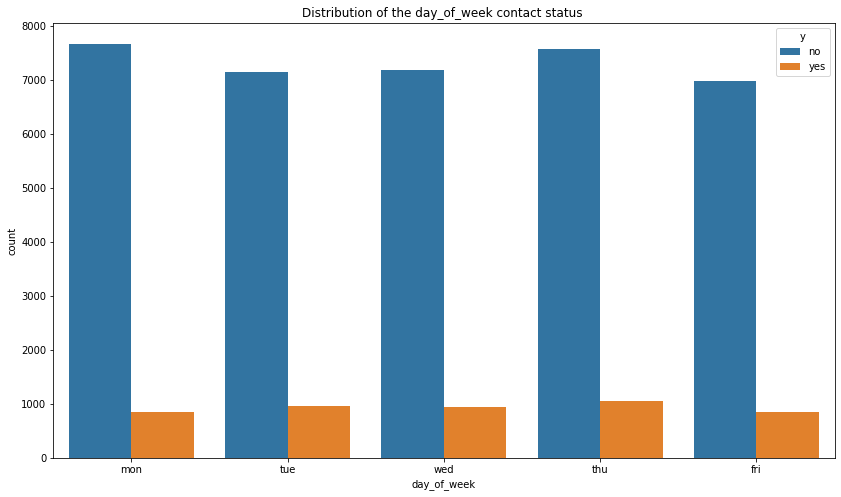

In [132]:
plt.figure(figsize=(14,8))
sns.countplot(x='day_of_week',hue='y',data=data)
plt.title('Distribution of the day_of_week contact status ')

11.Duration

In [133]:
data["duration"].value_counts()

90      170
85      170
136     168
73      167
124     163
       ... 
1569      1
1053      1
1263      1
1169      1
1868      1
Name: duration, Length: 1544, dtype: int64

As explained in the data description , this can be discarded since we are preparing a preditive model 

12.campaign

In [134]:
data["campaign"].value_counts()

1     17634
2     10568
3      5340
4      2650
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
16       51
15       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
28        8
26        8
25        8
31        7
30        7
35        5
32        4
33        4
34        3
42        2
40        2
43        2
56        1
39        1
41        1
37        1
Name: campaign, dtype: int64

Text(0.5, 1.0, 'Distribution of the campaign status ')

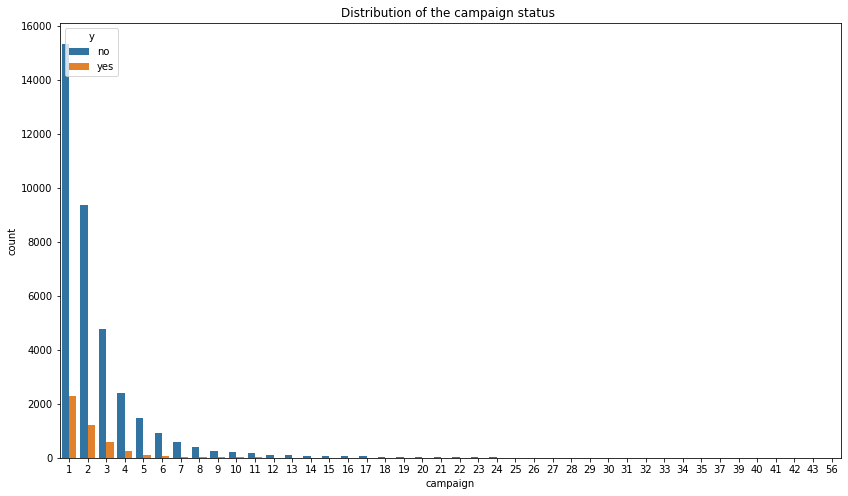

In [135]:
plt.figure(figsize=(14,8))
sns.countplot(x='campaign',hue='y',data=data)
plt.title('Distribution of the campaign status ')

13.pdays

In [136]:
data["pdays"].value_counts()

999    39661
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: pdays, dtype: int64

Text(0.5, 1.0, 'Distribution of the pdays status ')

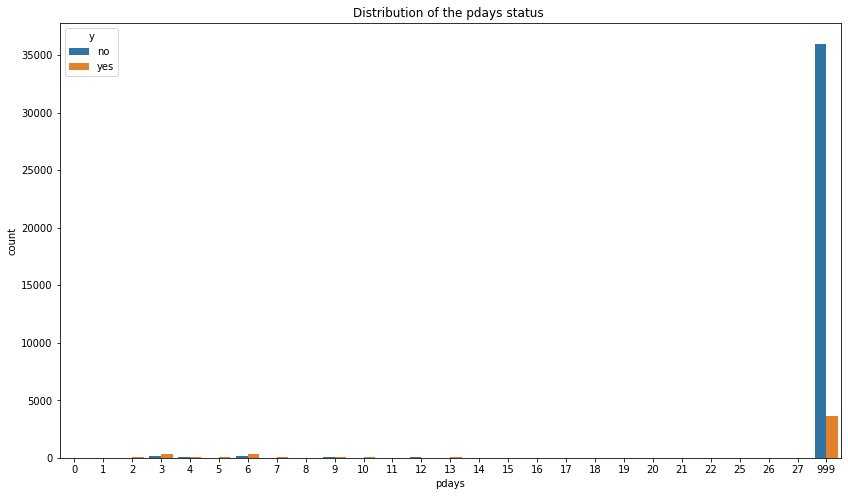

In [137]:
plt.figure(figsize=(14,8))
sns.countplot(x='pdays',hue='y',data=data)
plt.title('Distribution of the pdays status ')

Client not previously contacted is having the highest number in this case

14.previous

In [138]:
data["previous"].value_counts()

0    35551
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

Text(0.5, 1.0, 'Distribution of the previous status ')

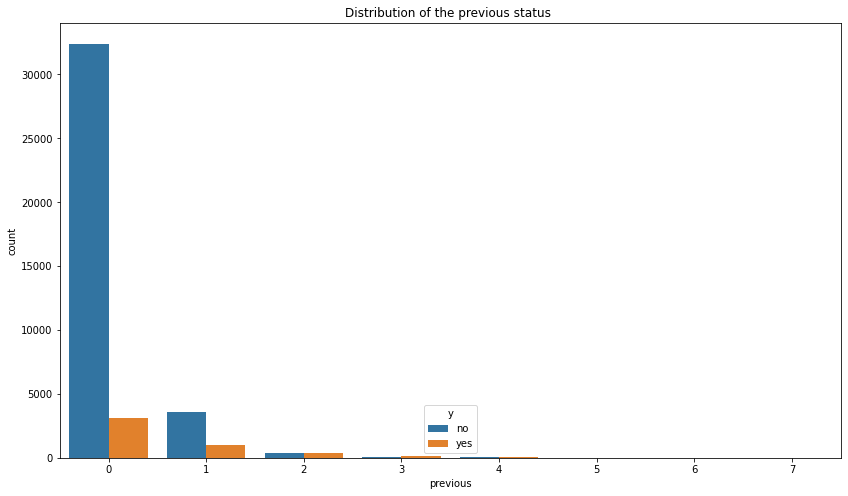

In [139]:
plt.figure(figsize=(14,8))
sns.countplot(x='previous',hue='y',data=data)
plt.title('Distribution of the previous status ')

No of contact performed before this campaign is zero for most cases and opted number is also high in 0

15.poutcome

In [140]:
data["poutcome"].value_counts()

nonexistent    35551
failure         4252
success         1373
Name: poutcome, dtype: int64

Text(0.5, 1.0, 'Distribution of the poutcome status ')

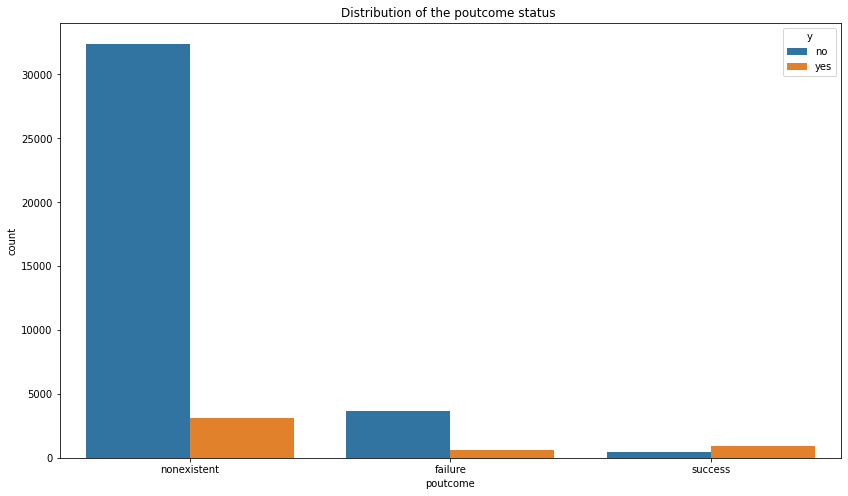

In [141]:
plt.figure(figsize=(14,8))
sns.countplot(x='poutcome',hue='y',data=data)
plt.title('Distribution of the poutcome status ')

Sucessful outcomes in previous campaign status has high change of opting and they are more in number than other 2 cases

16.emp.var.rate

In [142]:
data["emp.var.rate"].value_counts()

 1.4    16228
-1.8     9182
 1.1     7762
-0.1     3682
-2.9     1662
-3.4     1070
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp.var.rate, dtype: int64

Text(0.5, 1.0, 'Distribution of the emp.var.rate status ')

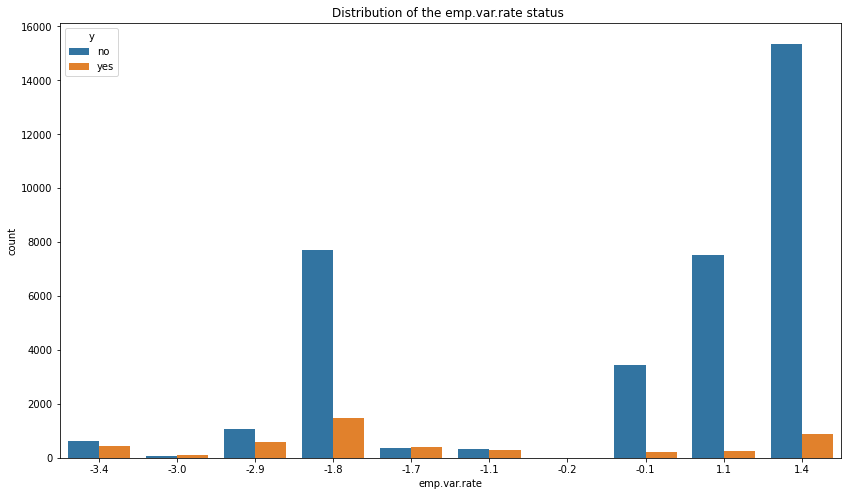

In [143]:
plt.figure(figsize=(14,8))
sns.countplot(x='emp.var.rate',hue='y',data=data)
plt.title('Distribution of the emp.var.rate status ')

17. cons.price.idx

In [144]:
data["cons.price.idx"].value_counts()

93.994    7762
93.918    6681
92.893    5793
93.444    5173
94.465    4374
93.200    3615
93.075    2457
92.201     770
92.963     715
92.431     446
92.649     357
94.215     311
94.199     303
92.843     282
92.379     267
93.369     264
94.027     233
94.055     229
93.876     212
94.601     204
92.469     177
93.749     174
92.713     172
94.767     128
93.798      67
92.756      10
Name: cons.price.idx, dtype: int64

Text(0.5, 1.0, 'Distribution of the cons.price.idx status ')

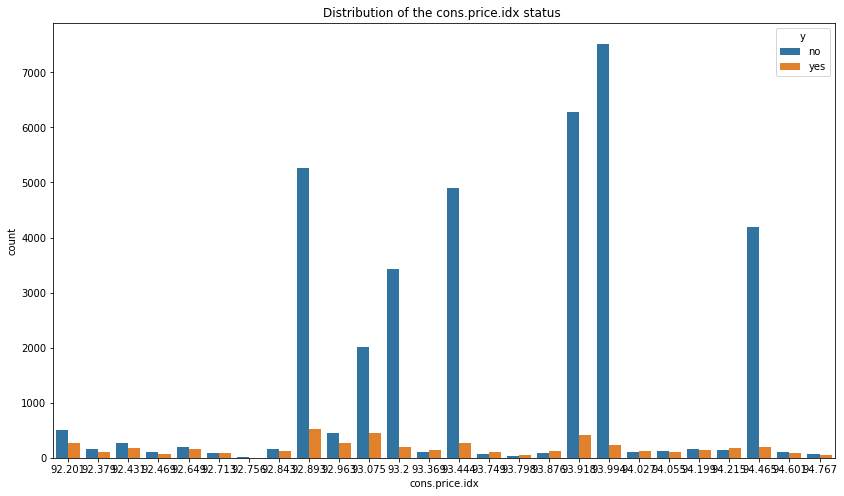

In [145]:
plt.figure(figsize=(14,8))
sns.countplot(x='cons.price.idx',hue='y',data=data)
plt.title('Distribution of the cons.price.idx status ')

18.cons.conf.idx

In [146]:
data["cons.conf.idx"].value_counts()

-36.4    7762
-42.7    6681
-46.2    5793
-36.1    5173
-41.8    4374
-42.0    3615
-47.1    2457
-31.4     770
-40.8     715
-26.9     446
-30.1     357
-40.3     311
-37.5     303
-50.0     282
-29.8     267
-34.8     264
-38.3     233
-39.8     229
-40.0     212
-49.5     204
-33.6     177
-34.6     174
-33.0     172
-50.8     128
-40.4      67
-45.9      10
Name: cons.conf.idx, dtype: int64

Text(0.5, 1.0, 'Distribution of the cons.conf.idx status ')

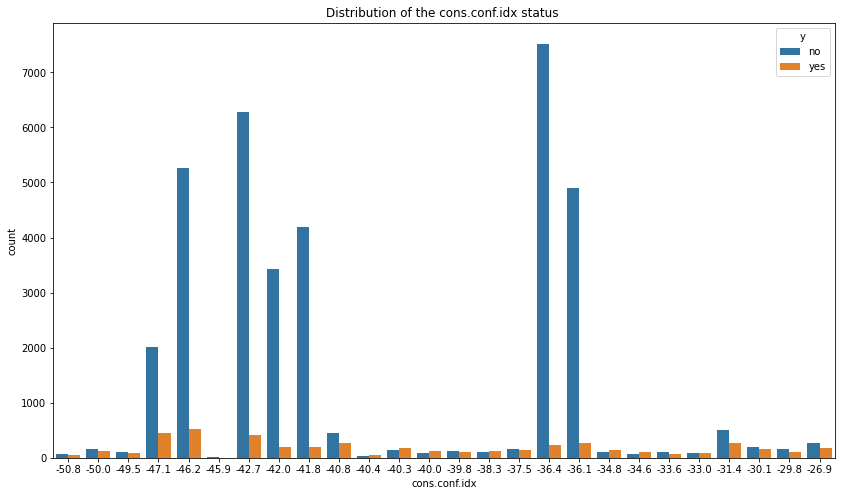

In [147]:
plt.figure(figsize=(14,8))
sns.countplot(x='cons.conf.idx',hue='y',data=data)
plt.title('Distribution of the cons.conf.idx status ')

19.euribor3m

In [148]:
data["euribor3m"].value_counts()

4.857    2868
4.962    2611
4.963    2487
4.961    1902
4.856    1210
         ... 
3.853       1
3.901       1
0.969       1
0.956       1
3.669       1
Name: euribor3m, Length: 316, dtype: int64

Text(0.5, 1.0, 'Distribution of the euribor3m status ')

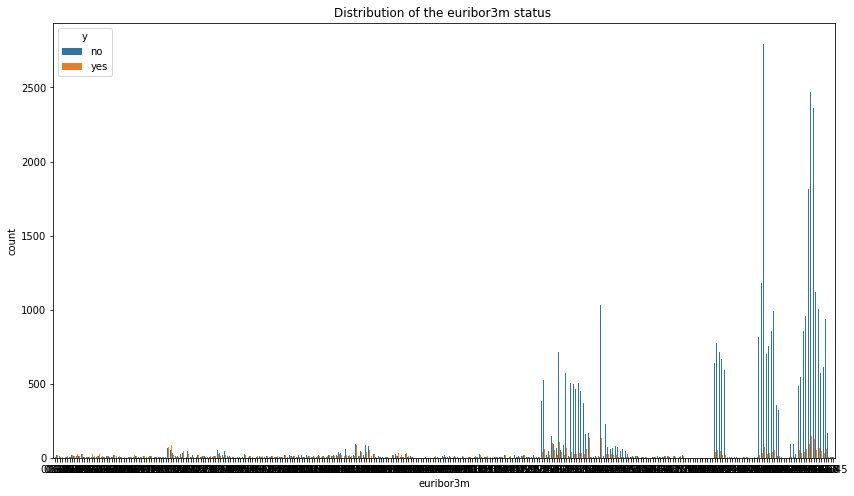

In [149]:
plt.figure(figsize=(14,8))
sns.countplot(x='euribor3m',hue='y',data=data)
plt.title('Distribution of the euribor3m status ')

20.nr.employed

In [150]:
data["nr.employed"].value_counts()

5228.1    16228
5099.1     8532
5191.0     7762
5195.8     3682
5076.2     1662
5017.5     1070
4991.6      773
5008.7      650
4963.6      635
5023.5      172
5176.3       10
Name: nr.employed, dtype: int64

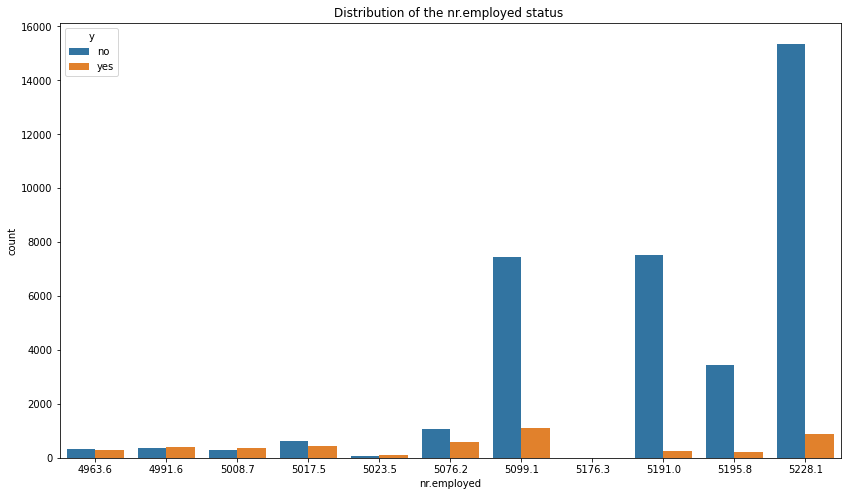

In [151]:
plt.figure(figsize=(14,8))
plt.title('Distribution of the nr.employed status ')
sns.countplot(x='nr.employed',hue='y',data=data)



Insights from the EDA
1. Job: most number of people are from Admin job type 
2. Default: we can see with no as input client took the term deposit more in number 
3. Marital: Majority of clients are married but no dependency with respect to target variable found  
4. Education: Client with university degree and high school were approached more as compare to other and they have higher success rate as well.
5. Housing: Housing loan does not have much effect on the number of term deposit purchased as people with and without have purchased almost equal numbers
6. Loan: Majority of the people approached are without loan and people with no loan have deposited more in number than other 2 category
7. Contact: Cellular type communication are more successful in depositing 
8. Month: MOst people  were approached in may and in January, Febuary we don't have data . Success rate was almost same in june, july ,april August with may slightly more
9. day_of_week: We have 5 days collected values. There is no significant difference found .
10. poutcome: If a client took the term deposit last time than there is higher chances of that client subscribing to it again.
11. In previous contact , number is more for 0 and opted is also more for 0 
12. employment variation rate,consumer price index ,consumer confidence index ,euribor 3 month rate are factors which are related to economy and might vary . So not sure how we can use this for modelling as they are fluctuating factors 


Preprocessing

 1. Missing Vales  

We have unknowns in many variables which are equivalent to the missing values , we can either delete this or fill those values using the mean , median , mode techniques

In [152]:
for column in ['job','marital','education','default', 'housing', 'loan']:
    data[column] = data[column].replace('unknown', np.NaN)

In [153]:
data.isnull().sum().to_frame().style.bar(color="red")

,0
age,0
job,330
marital,80
education,1730
default,8596
housing,990
loan,990
contact,0
month,0
day_of_week,0


Now we can see that there are missing values in those columns which are replaced . We will fill those with mode values since they are categorical data type columns 

In [154]:
for column in ['job','marital','education','default', 'housing', 'loan']:
    data[column].fillna(data[column].mode()[0], inplace=True)

In [155]:
data.isnull().sum().to_frame().style.bar(color="red")

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


We have filled the values with mode and thus we can see that now there are no more missing values 

2. Outliers 

Distribution of  age


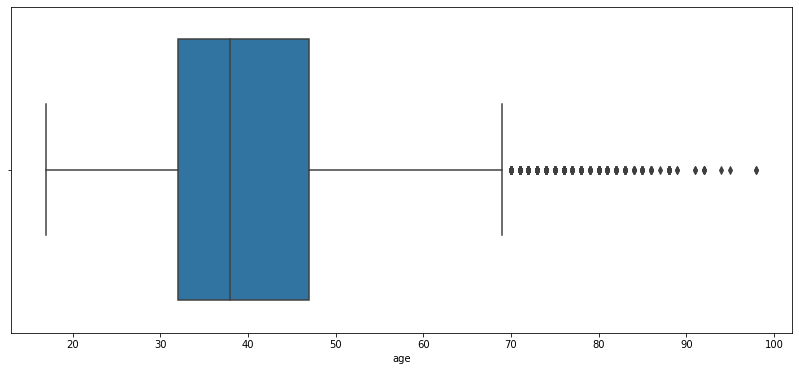

Distribution of  duration


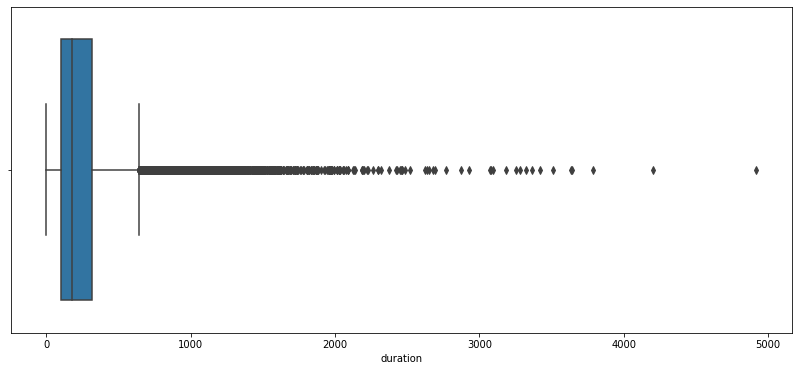

Distribution of  campaign


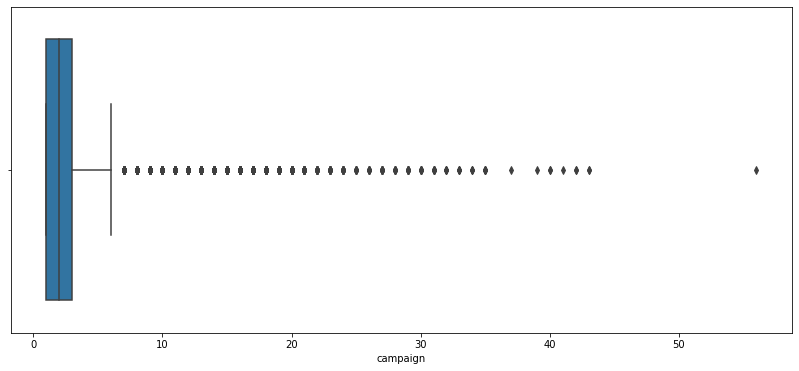

Distribution of  pdays


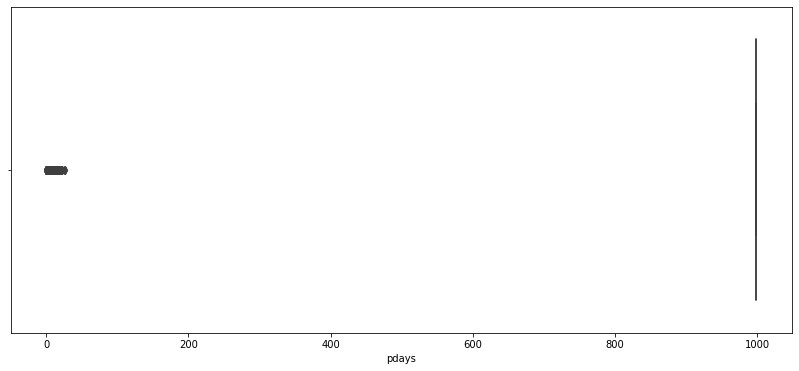

Distribution of  previous


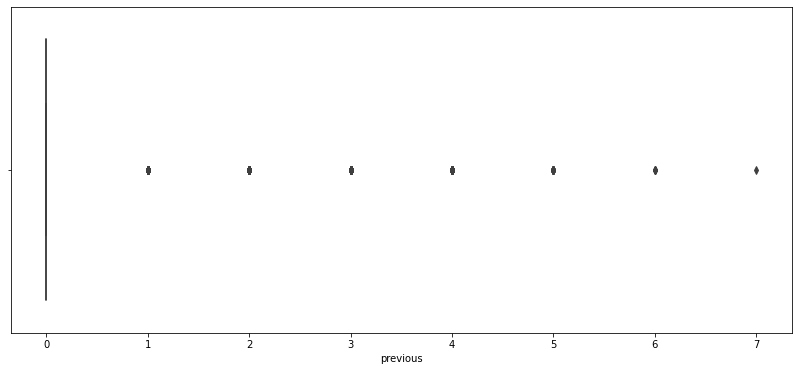

Distribution of  emp.var.rate


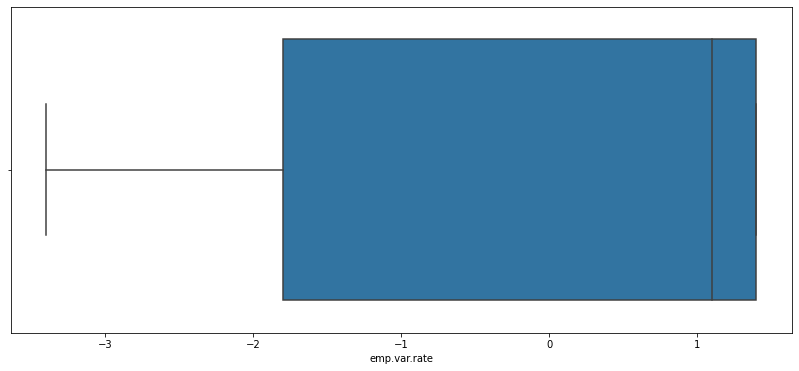

Distribution of  cons.price.idx


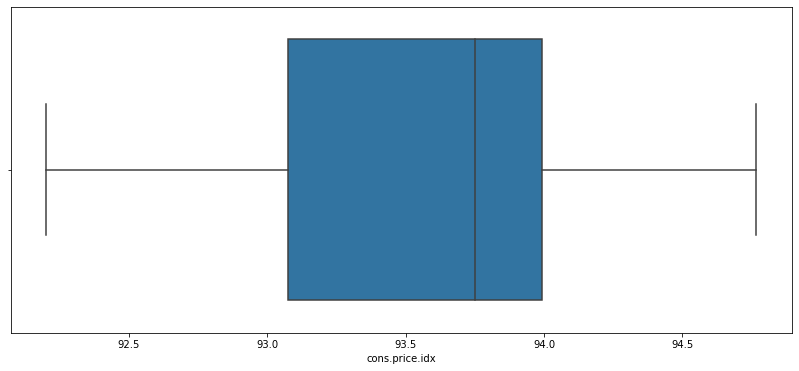

Distribution of  cons.conf.idx


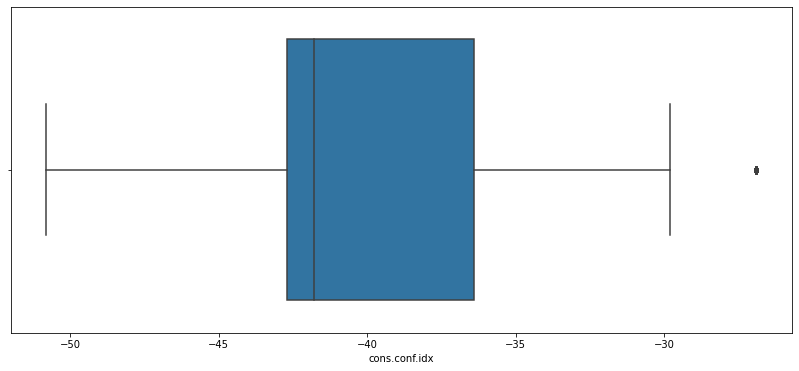

Distribution of  euribor3m


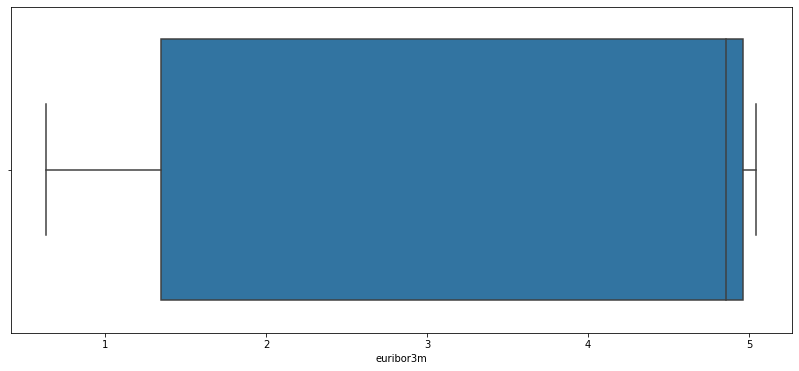

Distribution of  nr.employed


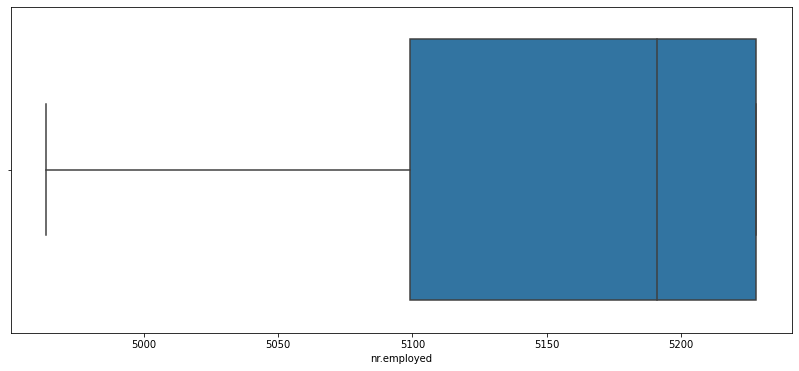

In [156]:
columns=["age","duration","campaign","pdays","previous","emp.var.rate","cons.price.idx","cons.conf.idx","euribor3m","nr.employed"]
for i in columns:
    plt.figure(figsize=(14, 6))
    sns.boxplot(x=data[i])
    print("Distribution of ",i )
    plt.show()

From the above graphs we can handle the outliers for the age and campaign.Duration will be removed , hence not handling the outliers

In [157]:
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)

In [158]:
Q1

32.0

In [159]:
Q3

47.0

In [160]:
data['age'].loc[data['age']>upper_whisker]

27713    70
27757    76
27780    73
27800    88
27802    88
         ..
40986    84
40996    81
41004    80
41183    73
41187    74
Name: age, Length: 468, dtype: int64

In [161]:
data['age'].loc[data['age']<lower_whisker]

Series([], Name: age, dtype: int64)

In [162]:
data['age']=np.where(data['age']>upper_whisker,upper_whisker,np.where(data['age']<lower_whisker,lower_whisker,data['age']))

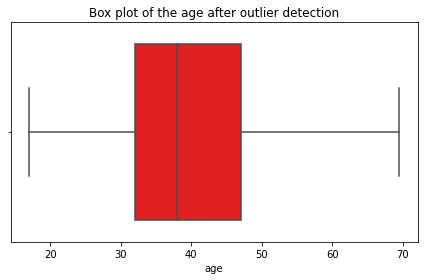

In [163]:
sns.boxplot(x=data['age'],color="red")
plt.title("Box plot of the age after outlier detection")
plt.tight_layout()
plt.show()

We can see that the outlier has been handled , the ages above 70 have been clipped to the upper limit 

In [164]:
Q11 = data['campaign'].quantile(0.15)
Q33 = data['campaign'].quantile(0.85)
IQR = Q33 - Q11
whisker_width = 1.5
low_whisker = Q11 -(whisker_width*IQR)
up_whisker = Q33 + (whisker_width*IQR)

In [165]:
data['campaign'].loc[data['campaign']>up_whisker]

1467      9
1484      9
1866      9
1980      9
2183     10
         ..
40091    10
40148     9
40529    16
40611     9
40821     9
Name: campaign, Length: 1377, dtype: int64

In [166]:
data['campaign']=np.where(data['campaign']>up_whisker,up_whisker,np.where(data['campaign']<low_whisker,low_whisker,data['campaign']))

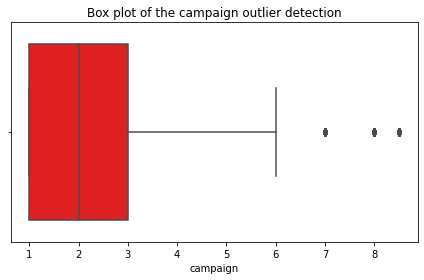

In [167]:
sns.boxplot(x=data['campaign'],color="red")
plt.title("Box plot of the campaign outlier detection")
plt.tight_layout()
plt.show()

We can see that the outlier has been handled in campaign also 

3. Feature Engineering 

In [168]:
data['pdays'].value_counts()

999    39661
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: pdays, dtype: int64

This 999 is not contacted before . so this can be replaced with zero

In [169]:
data['pdays'] = data['pdays'].replace(999,0)
data.pdays.value_counts()

0     39676
3       439
6       412
4       118
9        64
2        61
7        60
12       58
10       52
5        46
13       36
11       28
1        26
15       24
14       20
8        18
16       11
17        8
18        7
22        3
19        3
21        2
25        1
26        1
27        1
20        1
Name: pdays, dtype: int64

Here in education we can combine the 'basic.9y','basic.6y','basic.4y' in to middle school for simplication

In [170]:
lst=['basic.9y','basic.6y','basic.4y']
for i in lst:
    data.loc[data['education'] == i, 'education'] = "middle.school"
data['education'].value_counts()

university.degree      13894
middle.school          12512
high.school             9512
professional.course     5240
illiterate                18
Name: education, dtype: int64

4. Encoding

In [171]:
data[data.select_dtypes(include=['object']).columns.tolist()].nunique()

job            11
marital         3
education       5
default         2
housing         2
loan            2
contact         2
month          10
day_of_week     5
poutcome        3
y               2
dtype: int64

Here all are having less number of unique values , hence we can use the label encoding sincemost of them are having either 2 or 3 

In [172]:
data.month

0        may
1        may
2        may
3        may
4        may
        ... 
41183    nov
41184    nov
41185    nov
41186    nov
41187    nov
Name: month, Length: 41176, dtype: object

In [173]:
data.month = data.month.replace(['mar','apr','may','jun', 'jul','aug', 'sep','oct','nov','dec'],[3,4,5,6,7,8,9,10,11,12])
data.month

0         5
1         5
2         5
3         5
4         5
         ..
41183    11
41184    11
41185    11
41186    11
41187    11
Name: month, Length: 41176, dtype: int64

In [174]:
from sklearn.preprocessing import LabelEncoder

obj_var=['job','marital','education','default','housing','contact','poutcome','loan']
Le = LabelEncoder()
data[obj_var]=data[obj_var].apply(Le.fit_transform)

In [175]:
dictionary1={'no':0,'yes':1}
data['y']=data['y'].map(dictionary1)

In [176]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,3,1,2,0,0,0,1,5,mon,...,1.0,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57.0,7,1,0,0,0,0,1,5,mon,...,1.0,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37.0,7,1,0,0,1,0,1,5,mon,...,1.0,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40.0,0,1,2,0,0,0,1,5,mon,...,1.0,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56.0,7,1,0,0,0,1,1,5,mon,...,1.0,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [177]:
data_copy=data.copy()

In [178]:
data=data.drop(["day_of_week","duration"],axis=1)

In [179]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,3,1,2,0,0,0,1,5,1.0,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57.0,7,1,0,0,0,0,1,5,1.0,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37.0,7,1,0,0,1,0,1,5,1.0,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40.0,0,1,2,0,0,0,1,5,1.0,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56.0,7,1,0,0,0,1,1,5,1.0,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0


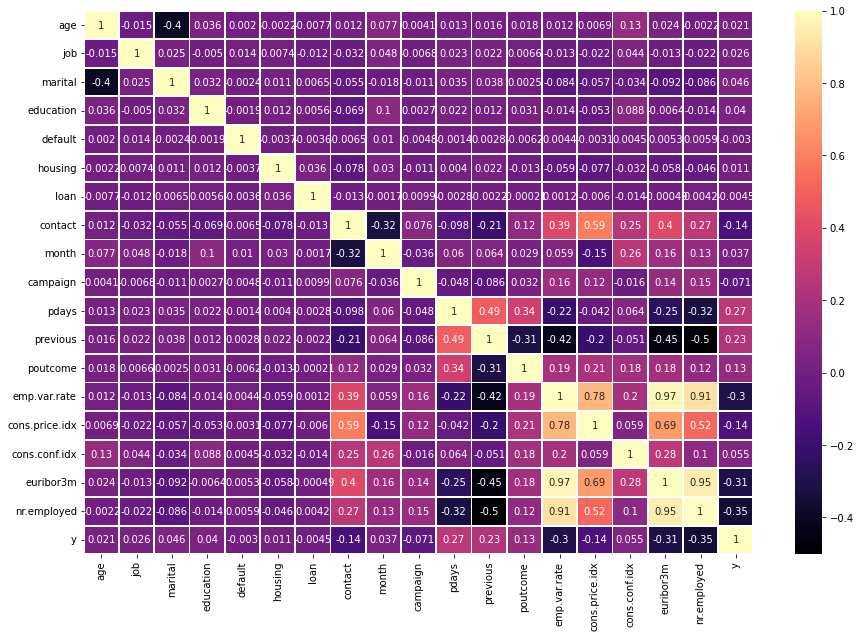

In [180]:
plt.figure(figsize=(15,10))
correlations = data.corr()
sns.heatmap(correlations, annot=True,linewidths=0.9, cmap='magma')
plt.show()

We can see that the emp.var.rate is highly correlated with he euribor3m and nr.employed variables , so we can delete those two and keep emp.var.rate 

In [181]:
corr_matrix = data.corr()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Find index of feature columns with correlation greater than 0.75 or less than 0.75
to_drop = [column for column in upper.columns if any(abs(upper[column] > 0.75))]
print(to_drop)

['cons.price.idx', 'euribor3m', 'nr.employed']


In [182]:
data=data.drop(to_drop,axis=1)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,campaign,pdays,previous,poutcome,emp.var.rate,cons.conf.idx,y
0,56.0,3,1,2,0,0,0,1,5,1.0,0,0,1,1.1,-36.4,0
1,57.0,7,1,0,0,0,0,1,5,1.0,0,0,1,1.1,-36.4,0
2,37.0,7,1,0,0,1,0,1,5,1.0,0,0,1,1.1,-36.4,0
3,40.0,0,1,2,0,0,0,1,5,1.0,0,0,1,1.1,-36.4,0
4,56.0,7,1,0,0,0,1,1,5,1.0,0,0,1,1.1,-36.4,0


In [183]:
X=data.drop(['y'],axis=1)
y=data['y']

In [184]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler(feature_range =(0,1))
X = min_max.fit_transform(X)

In [185]:
data.describe().style.background_gradient(cmap="Spectral")

,age,job,marital,education,default,housing,loan,contact,month,campaign,pdays,previous,poutcome,emp.var.rate,cons.conf.idx,y
count,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,39.939236,3.636026,1.168861,2.339664,0.000073,0.547916,0.151739,0.365286,6.607733,2.393785,0.221294,0.173013,0.930081,0.081922,-40.502863,0.112663
std,10.128801,3.549542,0.603590,1.511996,0.008535,0.497705,0.358772,0.481516,2.041013,1.880118,1.349065,0.494964,0.362937,1.570883,4.627860,0.316184
min,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,-3.400000,-50.800000,0.000000
25%,32.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,1.000000,-1.800000,-42.700000,0.000000
50%,38.000000,2.000000,1.000000,2.000000,0.000000,1.000000,0.000000,0.000000,6.000000,2.000000,0.000000,0.000000,1.000000,1.100000,-41.800000,0.000000
75%,47.000000,7.000000,2.000000,4.000000,0.000000,1.000000,0.000000,1.000000,8.000000,3.000000,0.000000,0.000000,1.000000,1.400000,-36.400000,0.000000
max,69.500000,10.000000,2.000000,4.000000,1.000000,1.000000,1.000000,1.000000,12.000000,8.500000,27.000000,7.000000,2.000000,1.400000,-26.900000,1.000000


From the table we can see that almost all the values are in same scale 

In [186]:
y.value_counts(normalize=True).to_frame()

,y
0,0.887337
1,0.112663


We can see that there is imbalance in the target column , we need to balance it otherwise model prediction will also be imbalanced

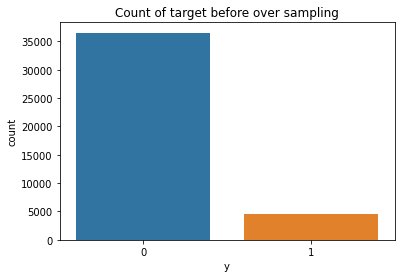

In [187]:
sns.countplot(y)
plt.title("Count of target before over sampling")
plt.show()

Here we can see that the data is highly imbalanced. The % yes is 11.2 % compared to no of 88.73%

So we have to make the dataset balanced

Here we will go for oversampling as in undersampling data drop will be there .

Oversampling will create new examples in minority class and can keep the data in dataset

In [188]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()
X_os, y_os = smt.fit_resample(X, y)

In [235]:
X_os.shape

(73074, 15)

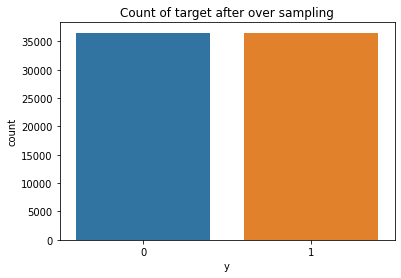

In [189]:
sns.countplot(y_os)
plt.title("Count of target after over sampling")
plt.show()

In [190]:
#Checking the imbalance of the dataset
y_os.value_counts(normalize=True).to_frame()
# We can see from the below that the data has become balanced now and now we can proceed for the modelling 

,y
0,0.5
1,0.5


In [191]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_os,y_os,random_state=42,test_size=0.25)

In [192]:
!pip install catboost
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


1.Logistic Regression

In [193]:
log_model=LogisticRegression()
log_model.fit(X_train,y_train)

y_predict=log_model.predict(X_test)

In [194]:
print("Results from logistic regression are as below")
log_result = classification_report(y_predict,y_test,output_dict=True)
log_result = pd.DataFrame(log_result).transpose()
log_result.style.background_gradient(cmap="BuPu")


Results from logistic regression are as below


,precision,recall,f1-score,support
0,0.757144,0.704052,0.729634,9897.000000
1,0.676925,0.733039,0.703865,8372.000000
accuracy,0.717335,0.717335,0.717335,0.717335
macro avg,0.717035,0.718545,0.716749,18269.000000
weighted avg,0.720383,0.717335,0.717825,18269.000000


In [195]:
print("Confusion Matrix of Logistic Regression \n" ,confusion_matrix(y_predict,y_test))

Confusion Matrix of Logistic Regression 
 [[6968 2929]
 [2235 6137]]


2.SVM

In [196]:
SV=SVC()
SV.fit(X_train,y_train)
y_pred=SV.predict(X_test)

In [197]:
print("Results from SVM are as below")
SVM_result = classification_report(y_pred,y_test,output_dict=True)
SVM_result = pd.DataFrame(SVM_result).transpose()
SVM_result.style.background_gradient(cmap="BuPu")


Results from SVM are as below


,precision,recall,f1-score,support
0,0.785939,0.721712,0.752458,10022.000000
1,0.692367,0.761125,0.725120,8247.000000
accuracy,0.739504,0.739504,0.739504,0.739504
macro avg,0.739153,0.741419,0.738789,18269.000000
weighted avg,0.743699,0.739504,0.740117,18269.000000


In [198]:
print("Confusion Matrix of SVM \n" ,confusion_matrix(y_pred,y_test))

Confusion Matrix of SVM 
 [[7233 2789]
 [1970 6277]]


3.KNN

[0.8772784498330505, 0.8523728720783842, 0.8514970715419563, 0.8420274782418304, 0.8360063495538891, 0.829930483332421, 0.8222124911051508, 0.8173955881547977, 0.8111007717992227, 0.80896600799168, 0.8029448793037386, 0.8025617165690514, 0.7982921889539657, 0.7979637637528053, 0.7935847610706661, 0.7950626744758881, 0.7892604959220537, 0.7894794460561607, 0.7851551809075483]


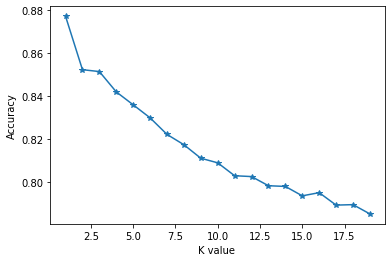

In [199]:
KNN_values=[]
neighbours=np.arange(1,20)
for k in neighbours:
    KNN=KNeighborsClassifier(n_neighbors=k,metric="minkowski")
    KNN.fit(X_train,y_train)
    y_pred1=KNN.predict(X_test)
    acc=accuracy_score(y_test,y_pred1)
    KNN_values.append(acc)
print(KNN_values)   
plt.plot(neighbours,KNN_values,"*-")
plt.xlabel("K value ")
plt.ylabel("Accuracy")
plt.show()

In [200]:
KNN=KNeighborsClassifier(n_neighbors=1,metric="minkowski")
KNN.fit(X_train,y_train)
y_pred1=KNN.predict(X_test)

In [201]:
print("Results from KNN are as below")
KNN_result = classification_report(y_pred1,y_test,output_dict=True)
KNN_result = pd.DataFrame(KNN_result).transpose()
KNN_result.style.background_gradient(cmap="BuPu")


Results from KNN are as below


,precision,recall,f1-score,support
0,0.857981,0.894123,0.875679,8831.000000
1,0.896867,0.861517,0.878837,9438.000000
accuracy,0.877278,0.877278,0.877278,0.877278
macro avg,0.877424,0.877820,0.877258,18269.000000
weighted avg,0.878070,0.877278,0.877311,18269.000000


In [202]:
print("Confusion Matrix of KNN \n" ,confusion_matrix(y_pred1,y_test))

Confusion Matrix of KNN 
 [[7896  935]
 [1307 8131]]


4.Decision Tree

In [203]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
y_pred2 = DT.predict(X_test)

In [204]:
print("Results from Decision Tree are as below")
DT_result = classification_report(y_pred2,y_test,output_dict=True)
DT_result = pd.DataFrame(DT_result).transpose()
DT_result.style.background_gradient(cmap="BuPu")


Results from Decision Tree are as below


,precision,recall,f1-score,support
0,0.900685,0.886240,0.893404,9353.000000
1,0.882638,0.897488,0.890001,8916.000000
accuracy,0.891729,0.891729,0.891729,0.891729
macro avg,0.891661,0.891864,0.891702,18269.000000
weighted avg,0.891877,0.891729,0.891743,18269.000000


In [205]:
print("Confusion Matrix of Decision Tree \n" ,confusion_matrix(y_pred2,y_test))

Confusion Matrix of Decision Tree 
 [[8289 1064]
 [ 914 8002]]


5.Random Forest

In [206]:
RF = RandomForestClassifier()
RF.fit(X_train,y_train) 
y_pred3 = RF.predict(X_test)

In [207]:
print("Results from Random Forest are as below")
RF_result = classification_report(y_pred3,y_test,output_dict=True)
RF_result = pd.DataFrame(RF_result).transpose()
RF_result.style.background_gradient(cmap="BuPu")


Results from Random Forest are as below


,precision,recall,f1-score,support
0,0.925676,0.904352,0.914890,9420.000000
1,0.900618,0.922703,0.911527,8849.000000
accuracy,0.913241,0.913241,0.913241,0.913241
macro avg,0.913147,0.913528,0.913208,18269.000000
weighted avg,0.913539,0.913241,0.913261,18269.000000


In [208]:
print("Confusion Matrix of Random Forest \n" ,confusion_matrix(y_pred3,y_test))

Confusion Matrix of Random Forest 
 [[8519  901]
 [ 684 8165]]


5.Gradient boosting

In [209]:
GB = GradientBoostingClassifier()
model = GB.fit(X_train,y_train)
y_pred4 = model.predict(X_test)

In [210]:
print("Results from Gradient Boosting are as below")
GB_result = classification_report(y_pred4,y_test,output_dict=True)
GB_result = pd.DataFrame(GB_result).transpose()
GB_result.style.background_gradient(cmap="BuPu")


Results from Gradient Boosting are as below


,precision,recall,f1-score,support
0,0.909160,0.840398,0.873428,9956.000000
1,0.824730,0.899435,0.860464,8313.000000
accuracy,0.867261,0.867261,0.867261,0.867261
macro avg,0.866945,0.869916,0.866946,18269.000000
weighted avg,0.870741,0.867261,0.867529,18269.000000


In [211]:
print("Confusion Matrix of Gradient Boosting \n" ,confusion_matrix(y_pred4,y_test))

Confusion Matrix of Gradient Boosting 
 [[8367 1589]
 [ 836 7477]]


6. Xtreme Gradient Boosting

In [212]:
xgb= XGBClassifier()
xgb_model = xgb.fit(X_train,y_train)
y_pred5 = xgb_model.predict(X_test)

In [213]:
print("Results from Xtreme Gradient boosting are as below")
xgb_result = classification_report(y_pred5,y_test,output_dict=True)
xgb_result = pd.DataFrame(xgb_result).transpose()
xgb_result.style.background_gradient(cmap="BuPu")


Results from Xtreme Gradient boosting are as below


,precision,recall,f1-score,support
0,0.906987,0.837716,0.870976,9964.000000
1,0.821641,0.896930,0.857636,8305.000000
accuracy,0.864634,0.864634,0.864634,0.864634
macro avg,0.864314,0.867323,0.864306,18269.000000
weighted avg,0.868189,0.864634,0.864912,18269.000000


In [214]:
print("Confusion Matrix of XGB \n" ,confusion_matrix(y_pred5,y_test))

Confusion Matrix of XGB 
 [[8347 1617]
 [ 856 7449]]


7.AdaBoost Classifier Model

In [215]:
AD=AdaBoostClassifier()
AD_model= AD.fit(X_train , y_train)
y_pred6=AD_model.predict(X_test)

In [216]:
print("Results from ADA booster are as below")
AD_result = classification_report(y_pred6,y_test,output_dict=True)
AD_result = pd.DataFrame(AD_result).transpose()
AD_result.style.background_gradient(cmap="BuPu")


Results from ADA booster are as below


,precision,recall,f1-score,support
0,0.883951,0.796612,0.838012,10212.000000
1,0.770902,0.867444,0.816329,8057.000000
accuracy,0.827850,0.827850,0.827850,0.827850
macro avg,0.827427,0.832028,0.827170,18269.000000
weighted avg,0.834094,0.827850,0.828449,18269.000000


In [217]:
print("Confusion Matrix of ADA booster \n" ,confusion_matrix(y_pred5,y_test))

Confusion Matrix of ADA booster 
 [[8347 1617]
 [ 856 7449]]


8.Gaussian Naiver Bayes

In [218]:
GNB=GaussianNB()
GNB_model=GNB.fit(X_train , y_train)
y_pred7=GNB_model.predict(X_test)

In [219]:
print("Results from Gaussian Naive bayer are as below")
GNB_result = classification_report(y_pred7,y_test,output_dict=True)
GNB_result = pd.DataFrame(GNB_result).transpose()
GNB_result.style.background_gradient(cmap="BuPu")


Results from Gaussian Naive bayer are as below


,precision,recall,f1-score,support
0,0.074324,0.782609,0.135755,874.000000
1,0.979043,0.510262,0.670874,17395.000000
accuracy,0.523291,0.523291,0.523291,0.523291
macro avg,0.526683,0.646435,0.403314,18269.000000
weighted avg,0.935760,0.523291,0.645274,18269.000000


In [220]:
print("Confusion Matrix of Gaussian Naive Bayer \n" ,confusion_matrix(y_pred5,y_test))

Confusion Matrix of Gaussian Naive Bayer 
 [[8347 1617]
 [ 856 7449]]


9.Bagging Classifier

In [221]:
BC=BaggingClassifier()
BC_model=BC.fit(X_train , y_train)
y_pred8=BC_model.predict(X_test)

In [222]:
print("Results from Bagging classifier are as below")
BC_result = classification_report(y_pred8,y_test,output_dict=True)
BC_result = pd.DataFrame(BC_result).transpose()
BC_result.style.background_gradient(cmap="BuPu")


Results from Bagging classifier are as below


,precision,recall,f1-score,support
0,0.934804,0.892242,0.913027,9642.000000
1,0.885396,0.930451,0.907364,8627.000000
accuracy,0.910285,0.910285,0.910285,0.910285
macro avg,0.910100,0.911347,0.910196,18269.000000
weighted avg,0.911472,0.910285,0.910353,18269.000000


In [223]:
print("Confusion Matrix of Bagging Classifier \n" ,confusion_matrix(y_pred8,y_test))

Confusion Matrix of Bagging Classifier 
 [[8603 1039]
 [ 600 8027]]


10.Cat boost 

In [224]:

Cat=CatBoostClassifier()
Cat_model=Cat.fit(X_train , y_train)
y_pred9=Cat_model.predict(X_test)

Learning rate set to 0.056939
0:	learn: 0.6685676	total: 72.2ms	remaining: 1m 12s
1:	learn: 0.6508002	total: 93.5ms	remaining: 46.7s
2:	learn: 0.6173764	total: 111ms	remaining: 36.8s
3:	learn: 0.5957702	total: 128ms	remaining: 32s
4:	learn: 0.5811692	total: 154ms	remaining: 30.6s
5:	learn: 0.5621761	total: 172ms	remaining: 28.5s
6:	learn: 0.5531713	total: 189ms	remaining: 26.8s
7:	learn: 0.5426269	total: 209ms	remaining: 25.9s
8:	learn: 0.5233731	total: 231ms	remaining: 25.4s
9:	learn: 0.5162263	total: 247ms	remaining: 24.4s
10:	learn: 0.5083660	total: 264ms	remaining: 23.8s
11:	learn: 0.5026995	total: 282ms	remaining: 23.2s
12:	learn: 0.4950492	total: 298ms	remaining: 22.6s
13:	learn: 0.4889268	total: 320ms	remaining: 22.5s
14:	learn: 0.4761961	total: 338ms	remaining: 22.2s
15:	learn: 0.4684182	total: 354ms	remaining: 21.8s
16:	learn: 0.4620264	total: 371ms	remaining: 21.4s
17:	learn: 0.4590667	total: 389ms	remaining: 21.2s
18:	learn: 0.4506829	total: 407ms	remaining: 21s
19:	learn: 0

In [225]:
print("Results from Catboost classifier are as below")
Cat_result = classification_report(y_pred9,y_test,output_dict=True)
Cat_result = pd.DataFrame(Cat_result).transpose()
Cat_result.style.background_gradient(cmap="BuPu")

Results from Catboost classifier are as below


,precision,recall,f1-score,support
0,0.971205,0.912786,0.941090,9792.000000
1,0.905802,0.968739,0.936214,8477.000000
accuracy,0.938749,0.938749,0.938749,0.938749
macro avg,0.938503,0.940762,0.938652,18269.000000
weighted avg,0.940857,0.938749,0.938827,18269.000000


In [226]:
print("Confusion Matrix of Catboost Classifier \n" ,confusion_matrix(y_pred9,y_test))

Confusion Matrix of Catboost Classifier 
 [[8938  854]
 [ 265 8212]]


In [227]:
#Combining the F1 score and accuracy results of all the models

In [228]:
dfc =pd.concat([log_result["f1-score"], SVM_result["f1-score"],KNN_result["f1-score"],DT_result["f1-score"],RF_result["f1-score"],GB_result["f1-score"], xgb_result["f1-score"],AD_result["f1-score"], GNB_result["f1-score"],BC_result["f1-score"],Cat_result["f1-score"]],axis=1)
dfc.columns
df2 = dfc.set_axis(["log_result", "SVM_result","KNN_result","DT_result","RF_result","GB_result", "xgb_result","AD_result","GNB_result","BC_result","Cat_result"], axis=1, inplace=False)

In [229]:
df2.loc[["macro avg","accuracy"]].transpose().sort_values(by="macro avg",ascending=False).style.background_gradient(cmap="RdPu")

,macro avg,accuracy
Cat_result,0.938652,0.938749
RF_result,0.913208,0.913241
BC_result,0.910196,0.910285
DT_result,0.891702,0.891729
KNN_result,0.877258,0.877278
GB_result,0.866946,0.867261
xgb_result,0.864306,0.864634
AD_result,0.827170,0.827850
SVM_result,0.738789,0.739504
log_result,0.716749,0.717335


Hyperparameter tuning 

We will take the top 2 baseline models and then will try to do hyper parameter tuning in those two and see whether that improves the performance

In [278]:
from sklearn.model_selection import RandomizedSearchCV
Cat=CatBoostClassifier()
parameters = {
               'learning_rate': np.linspace(0,0.2,5),
               'max_depth': range(1, 10, 2),
               'n_estimators': range(50, 400, 50),
              }

Cat_random = RandomizedSearchCV(Cat,parameters,cv = 5,n_jobs = 5,scoring="f1",verbose=True,random_state=100)

Cat_random.fit(X_train,y_train)

print(Cat_random.best_score_)
print(Cat_random.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
0:	learn: 0.6497431	total: 24.2ms	remaining: 7.24s
1:	learn: 0.6178911	total: 44.4ms	remaining: 6.62s
2:	learn: 0.5899900	total: 65ms	remaining: 6.44s
3:	learn: 0.5457585	total: 87.7ms	remaining: 6.49s
4:	learn: 0.5316557	total: 112ms	remaining: 6.61s
5:	learn: 0.5126435	total: 134ms	remaining: 6.57s
6:	learn: 0.4979892	total: 155ms	remaining: 6.5s
7:	learn: 0.4602817	total: 177ms	remaining: 6.47s
8:	learn: 0.4531289	total: 199ms	remaining: 6.45s
9:	learn: 0.4394585	total: 222ms	remaining: 6.43s
10:	learn: 0.4289374	total: 249ms	remaining: 6.54s
11:	learn: 0.4161210	total: 272ms	remaining: 6.52s
12:	learn: 0.4007380	total: 293ms	remaining: 6.46s
13:	learn: 0.3975048	total: 314ms	remaining: 6.42s
14:	learn: 0.3940901	total: 336ms	remaining: 6.39s
15:	learn: 0.3838464	total: 360ms	remaining: 6.39s
16:	learn: 0.3796244	total: 381ms	remaining: 6.33s
17:	learn: 0.3744990	total: 403ms	remaining: 6.31s
18:	learn: 0.3708787	total: 44

In [281]:
import time 
start=time.time()
Hyper_cat=CatBoostClassifier(n_estimators= 300, max_depth= 7, learning_rate= 0.1)
Hypercat_model=Hyper_cat.fit(X_train , y_train)
end=time.time()
cat_time=end-start
y_predcat=Hypercat_model.predict(X_test)

0:	learn: 0.6497431	total: 38.3ms	remaining: 11.4s
1:	learn: 0.6178911	total: 59.5ms	remaining: 8.87s
2:	learn: 0.5899900	total: 81.8ms	remaining: 8.09s
3:	learn: 0.5457585	total: 106ms	remaining: 7.82s
4:	learn: 0.5316557	total: 126ms	remaining: 7.45s
5:	learn: 0.5126435	total: 148ms	remaining: 7.26s
6:	learn: 0.4979892	total: 170ms	remaining: 7.11s
7:	learn: 0.4602817	total: 192ms	remaining: 7s
8:	learn: 0.4531289	total: 216ms	remaining: 6.97s
9:	learn: 0.4394585	total: 240ms	remaining: 6.96s
10:	learn: 0.4289374	total: 265ms	remaining: 6.96s
11:	learn: 0.4161210	total: 287ms	remaining: 6.88s
12:	learn: 0.4007380	total: 308ms	remaining: 6.79s
13:	learn: 0.3975048	total: 330ms	remaining: 6.73s
14:	learn: 0.3940901	total: 352ms	remaining: 6.69s
15:	learn: 0.3838464	total: 375ms	remaining: 6.65s
16:	learn: 0.3796244	total: 395ms	remaining: 6.58s
17:	learn: 0.3744990	total: 419ms	remaining: 6.56s
18:	learn: 0.3708787	total: 443ms	remaining: 6.54s
19:	learn: 0.3663618	total: 467ms	remaini

In [282]:
print("Results from Hyper tuned Cat are as below")
cathyper_result = classification_report(y_predcat,y_test,output_dict=True)
cathyper_result = pd.DataFrame(cathyper_result).transpose()
cathyper_result.style.background_gradient(cmap="PuRd")

Results from Hyper tuned Cat are as below


,precision,recall,f1-score,support
0,0.970553,0.911243,0.939963,9802.000000
1,0.904037,0.967993,0.934923,8467.000000
accuracy,0.937544,0.937544,0.937544,0.937544
macro avg,0.937295,0.939618,0.937443,18269.000000
weighted avg,0.939725,0.937544,0.937627,18269.000000


In [283]:
print("Confusion Matrix of hypertuned CAT boost \n" ,confusion_matrix(y_predcat,y_test))

Confusion Matrix of hypertuned CAT boost 
 [[8932  870]
 [ 271 8196]]


In [269]:
print("Time taken for the hyper tuned RF model to run is ", cat_time,"seconds")

Time taken for the hyper tuned RF model to run is  2.0597875118255615 seconds


2.Random Forest 

In [270]:
from pprint import pprint

rf = RandomForestClassifier(random_state = 42)

print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [287]:
params_rf={
 "n_estimators"    : range(50, 400, 50) ,
 "max_depth"        : range(20,60,10),
     "max_features":['auto', 'sqrt']
    
}

In [289]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = params_rf, n_iter = 5, cv = 4,scoring='f1',verbose=3, random_state=42)
rf_random.fit(X_train,y_train)

Fitting 4 folds for each of 5 candidates, totalling 20 fits
[CV 1/4] END max_depth=20, max_features=auto, n_estimators=50;, score=0.906 total time=   2.4s
[CV 2/4] END max_depth=20, max_features=auto, n_estimators=50;, score=0.903 total time=   2.4s
[CV 3/4] END max_depth=20, max_features=auto, n_estimators=50;, score=0.902 total time=   2.5s
[CV 4/4] END max_depth=20, max_features=auto, n_estimators=50;, score=0.901 total time=   2.9s
[CV 1/4] END max_depth=20, max_features=auto, n_estimators=300;, score=0.909 total time=  16.4s
[CV 2/4] END max_depth=20, max_features=auto, n_estimators=300;, score=0.906 total time=  13.8s
[CV 3/4] END max_depth=20, max_features=auto, n_estimators=300;, score=0.902 total time=  13.7s
[CV 4/4] END max_depth=20, max_features=auto, n_estimators=300;, score=0.903 total time=  13.9s
[CV 1/4] END max_depth=40, max_features=auto, n_estimators=300;, score=0.912 total time=  18.6s
[CV 2/4] END max_depth=40, max_features=auto, n_estimators=300;, score=0.913 tot

RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': range(20, 60, 10),
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': range(50, 400, 50)},
                   random_state=42, scoring='f1', verbose=3)

In [290]:
rf_random.best_params_

{'n_estimators': 300, 'max_features': 'auto', 'max_depth': 30}

In [292]:
start = time.time()
Hyper_rf=RandomForestClassifier(max_depth=30,max_features= "auto",
                       n_estimators=300, random_state=1)
Hyper_rfmodel=Hyper_rf.fit(X_train,y_train)
end =time.time()
y_pred_rf=Hyper_rfmodel.predict(X_test)
RF_time=end-start

In [293]:
print("Results from Hyper tuned Random Forest are as below")
RFhyper_result = classification_report(y_pred_rf,y_test,output_dict=True)
RFhyper_result = pd.DataFrame(RFhyper_result).transpose()
RFhyper_result.style.background_gradient(cmap="OrRd")

Results from Hyper tuned Random Forest are as below


,precision,recall,f1-score,support
0,0.924264,0.906243,0.915165,9386.000000
1,0.902934,0.921536,0.912140,8883.000000
accuracy,0.913679,0.913679,0.913679,0.913679
macro avg,0.913599,0.913889,0.913652,18269.000000
weighted avg,0.913893,0.913679,0.913694,18269.000000


In [294]:
print("Confusion Matrix after hypertuned RF\n" ,confusion_matrix(y_pred_rf,y_test))

Confusion Matrix after hypertuned RF
 [[8506  880]
 [ 697 8186]]


In [295]:
print("Time taken for the hyper tuned RF model to run is ", RF_time,"seconds")

Time taken for the hyper tuned RF model to run is  19.716516256332397 seconds


In [296]:
df_res =pd.concat([cathyper_result["f1-score"], RFhyper_result["f1-score"]],axis=1)
df_result=df_res.set_axis(["Hypertuned catboost results","Hyper tuned RF results"],axis=1)

In [297]:
df_final=df_result.loc[["macro avg","accuracy"]]
df_final

,Hypertuned catboost results,Hyper tuned RF results
macro avg,0.937443,0.913652
accuracy,0.937544,0.913679


In [299]:
df_final["Catboost before Hypertuning"]=[0.938652,0.938749]
df_final["RF before Hypertuning"]=[0.91320,0.913241]
df_final=df_final[list(("Catboost before Hypertuning","Hypertuned catboost results","RF before Hypertuning","Hyper tuned RF results"))]
df_final.style.background_gradient(cmap="YlOrRd")

,Catboost before Hypertuning,Hypertuned catboost results,RF before Hypertuning,Hyper tuned RF results
macro avg,0.938652,0.937443,0.913200,0.913652
accuracy,0.938749,0.937544,0.913241,0.913679


We can see that there is a slight improvement in the Random Forest hypertuned results and also in accuracy when compared to the Catboost results ,Even the False positive has also decreased in the case of Hypertuned RF results which is favourable for this problem .THere is not much improvement in case of Catboost . But time take for the random forest is slightly more than catboost . So considering that , Catboost performs better

PCA

In [234]:
X_train.shape

(54805, 15)

In [244]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.9)
pca_xtrain = pca.fit_transform(X_train)
pca_xtest=pca.fit_transform(X_test)
print(pca.explained_variance_ratio_)

[0.20348874 0.17186782 0.10826953 0.09614189 0.0950492  0.07891539
 0.06963921 0.05520142 0.03915615]


In [243]:
pca_xtrain.shape

(54805, 9)

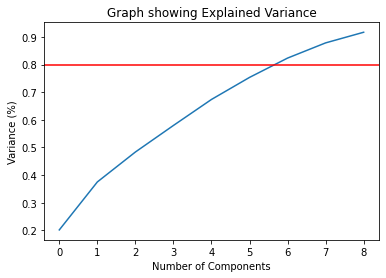

In [241]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Graph showing Explained Variance')
plt.axhline(y=0.80, color='r', linestyle='-')
plt.show()

In [247]:
Cat=CatBoostClassifier()
Catpca_model=Cat.fit(pca_xtrain , y_train)
y_pred10=Catpca_model.predict(pca_xtest)

Learning rate set to 0.056939
0:	learn: 0.6773414	total: 16ms	remaining: 16s
1:	learn: 0.6633430	total: 36.9ms	remaining: 18.4s
2:	learn: 0.6512713	total: 51.9ms	remaining: 17.3s
3:	learn: 0.6402729	total: 67.2ms	remaining: 16.7s
4:	learn: 0.6300109	total: 82.8ms	remaining: 16.5s
5:	learn: 0.6213293	total: 99.4ms	remaining: 16.5s
6:	learn: 0.6134982	total: 114ms	remaining: 16.2s
7:	learn: 0.6069521	total: 130ms	remaining: 16.1s
8:	learn: 0.6009073	total: 145ms	remaining: 16s
9:	learn: 0.5955558	total: 161ms	remaining: 15.9s
10:	learn: 0.5906856	total: 178ms	remaining: 16s
11:	learn: 0.5860403	total: 200ms	remaining: 16.5s
12:	learn: 0.5825204	total: 218ms	remaining: 16.5s
13:	learn: 0.5791000	total: 233ms	remaining: 16.4s
14:	learn: 0.5763824	total: 249ms	remaining: 16.3s
15:	learn: 0.5736431	total: 264ms	remaining: 16.2s
16:	learn: 0.5711216	total: 279ms	remaining: 16.1s
17:	learn: 0.5686579	total: 304ms	remaining: 16.6s
18:	learn: 0.5665785	total: 321ms	remaining: 16.6s
19:	learn: 0.

In [248]:
print("Results from Catboost classifier are as below")
Catpca_result = classification_report(y_pred10,y_test,output_dict=True)
Catpca_result = pd.DataFrame(Catpca_result).transpose()
Catpca_result.style.background_gradient(cmap="BuPu")

Results from Catboost classifier are as below


,precision,recall,f1-score,support
0,0.826252,0.686220,0.749754,11081.000000
1,0.616479,0.777546,0.687708,7188.000000
accuracy,0.722152,0.722152,0.722152,0.722152
macro avg,0.721366,0.731883,0.718731,18269.000000
weighted avg,0.743716,0.722152,0.725341,18269.000000


In [249]:
RFpca = RandomForestClassifier()
RFpca.fit(pca_xtrain,y_train) 
y_pred11 = RFpca.predict(pca_xtest)

In [250]:
print("Results from Random Forest are as below")
RFpca_result = classification_report(y_pred10,y_test,output_dict=True)
RFpca_result = pd.DataFrame(RFpca_result).transpose()
RFpca_result.style.background_gradient(cmap="BuPu")

Results from Random Forest are as below


,precision,recall,f1-score,support
0,0.826252,0.686220,0.749754,11081.000000
1,0.616479,0.777546,0.687708,7188.000000
accuracy,0.722152,0.722152,0.722152,0.722152
macro avg,0.721366,0.731883,0.718731,18269.000000
weighted avg,0.743716,0.722152,0.725341,18269.000000


Here PCA is not actually helping the model as this might be because , there are only very few variables in the dataset.PCA is very useful when there are more dimensions which the algorithm will find difficult to handle . 